[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


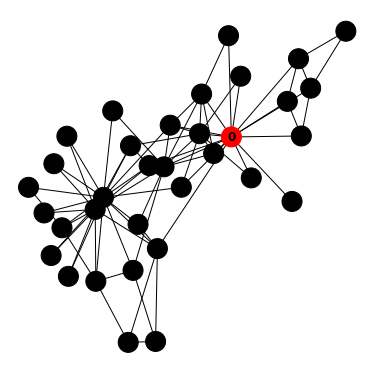

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
known = [0] * nx.number_of_nodes(G) 
dist = [-1] * nx.number_of_nodes(G)
lst = [-1] * nx.number_of_nodes(G)
read_pointer = 0
write_pointer = read_pointer + 1

colors = ['red', 'blue', 'deepskyblue', 'yellow', 'springgreen', 'lightskyblue', 'darkgreen', 'green', 'lightgreen', 'gray', 'lightgray']
color_map = ['black'] * nx.number_of_nodes(G)

lst[0] = 0 # start from 0
dist[read_pointer] = 0 # distance 0
color_map[read_pointer] = colors[dist[read_pointer]]
known[read_pointer] = 1










print(dist)
print(known)
print(lst)
plt.figure(figsize=(5, 5))
nx.draw_spring(G, node_size=400, node_color=color_map, with_labels=True, font_weight='bold')

[0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 2, 1, 3, 1, 3, 1, 3, 3, 2, 2, 3, 2, 2, 3, 2, 1, 2, 2]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31, 30, 9, 27, 28, 32, 16, 33, 24, 25, 23, 14, 15, 18, 20, 22, 29, 26]


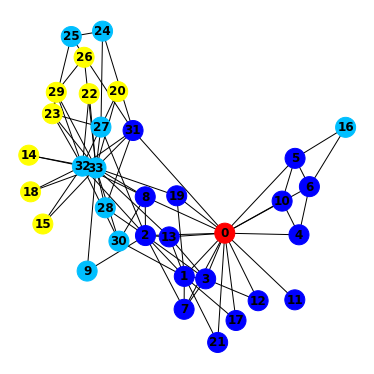

In [45]:
while read_pointer != (len(known)-1):
    for i in G.neighbors(lst[read_pointer]):
    #     pdb.set_trace()
        if known[i] == 0:
            dist[i] = dist[lst[read_pointer]] + 1
            color_map[i] = colors[dist[i]]
            lst[write_pointer] = i
            known[i] = 1
            write_pointer += 1
    read_pointer += 1

print(dist)
print(known)
print(lst)
plt.figure(figsize=(5, 5))
nx.draw_spring(G, node_size=400, node_color=color_map, with_labels=True, font_weight='bold')

# Why BFS is not suitable for networks with varying edge lengths



It's obvious that for a network, BFS will return the traversal path that the number of edges from the root node are the least. So when a network with varying edge lengths, that is, when a graph is a weighted graph, BFS will still return the traversal path with least edge number, but at this situation, the distance from root node is probably not the shortest one, because BFS doesn't consider the edge lengths when searching.